## Queation 2

In [29]:
import numpy as np
import matplotlib.pyplot as plt

#caculate the multivariate Gaussian 
def caculate_Z(X, Y, num, u, c):
    pos = np.concatenate((np.expand_dims(X,axis=2),np.expand_dims(Y,axis=2)),axis=2)
    a = (pos-u).dot(np.linalg.inv(c))
    b = np.expand_dims(pos-u,axis=3)
    Z = np.zeros((num,num), dtype=np.float32)
    for i in range(num):
        Z[i] = [np.dot(a[i,j],b[i,j]) for j in range(num)]
    Z = np.exp(Z*(-0.5))/(2*np.pi*np.linalg.det(c))
    return Z

In [30]:
num = 200
l = np.linspace(-5,5,num)
X, Y =np.meshgrid(l, l)

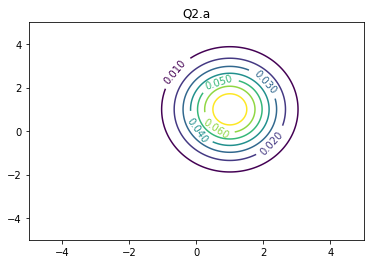

In [31]:
#question a
u = np.array([1, 1])
c = np.array([[1, 0],
              [0, 2]])
Z = caculate_Z(X, Y, num, u, c)
#plot the contour
plt.figure()
CSa = plt.contour(X,Y,Z)
plt.clabel(CSa, inline=1, fontsize=10)
plt.title('Q2.a')
plt.savefig('Q2_a.jpg')
plt.show()

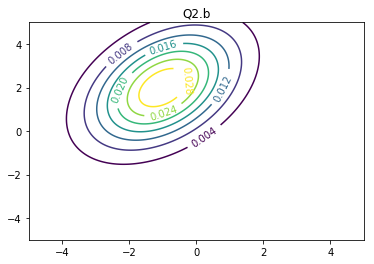

In [32]:
#question b
u = np.array([-1, 2])
c = np.array([[2, 1],
              [1, 3]])
Z = caculate_Z(X, Y, num, u, c)
#plot the contour
plt.figure()
CSb = plt.contour(X,Y,Z)
plt.clabel(CSb, inline=1, fontsize=10)
plt.title('Q2.b')
plt.savefig('Q2_b.jpg')
plt.show()

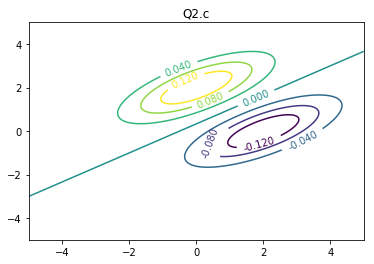

In [33]:
#question c
u1 = np.array([0, 2])
u2 = np.array([2, 0])
c = np.array([[2, 1],
              [1, 1]])
Z1 = caculate_Z(X, Y, num, u1, c)
Z2 = caculate_Z(X, Y, num, u2, c)
#plot the contour
plt.figure()
CSc = plt.contour(X,Y,Z1-Z2)
plt.clabel(CSc, inline=1, fontsize=10)
plt.title('Q2.c')
plt.savefig('Q2_c.jpg')
plt.show()

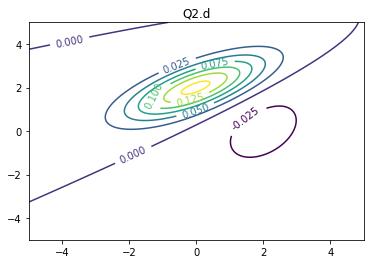

In [34]:
#question d
u1 = np.array([0, 2])
u2 = np.array([2, 0])
c1 = np.array([[2, 1],
              [1, 1]])
c2 = np.array([[2, 1],
              [1, 3]])
Z1 = caculate_Z(X, Y, num, u1, c1)
Z2 = caculate_Z(X, Y, num, u2, c2)
#plot the contour
plt.figure()
CSd = plt.contour(X,Y,Z1-Z2)
plt.clabel(CSd, inline=1, fontsize=10)
plt.title('Q2.d')
plt.savefig('Q2_d.jpg')
plt.show()

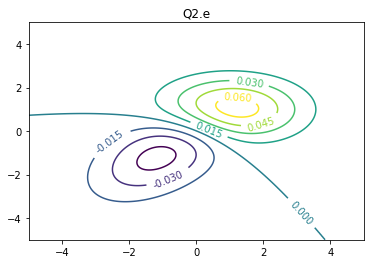

In [35]:
#question e
u1 = np.array([1, 1])
u2 = np.array([-1, -1])
c1 = np.array([[2, 0],
              [0, 1]])
c2 = np.array([[2, 1],
              [1, 2]])
Z1 = caculate_Z(X, Y, num, u1, c1)
Z2 = caculate_Z(X, Y, num, u2, c2)
#plot the contour
plt.figure()
CSe = plt.contour(X,Y,Z1-Z2)
plt.clabel(CSe, inline=1, fontsize=10)
plt.title('Q2.e')
plt.savefig('Q2_e.jpg')
plt.show()

## Question 3

In [102]:
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt

#?np.random.normal
np.random.seed(55)

# mu sigma sample size
X1 = np.random.normal(3, 3, 100)
X2 = 0.5*X1 + np.random.normal(4, 2, 100)

# combine as two-dimensional
X = np.concatenate((np.expand_dims(X1,axis=1),np.expand_dims(X2,axis=1)),axis=1)

In [108]:
## a
mean = np.mean(X,axis=0)
mean

array([3.04980504, 5.53171432])

In [109]:
## b
cov = np.cov(X.T)
cov

array([[9.73433323, 5.44667021],
       [5.44667021, 8.29743688]])

In [110]:
## c
eigen,eigen_vec=np.linalg.eig(cov)
print(eigen,"\n",eigen_vec)

[14.50973472  3.52203539] 
 [[ 0.75192193 -0.65925216]
 [ 0.65925216  0.75192193]]


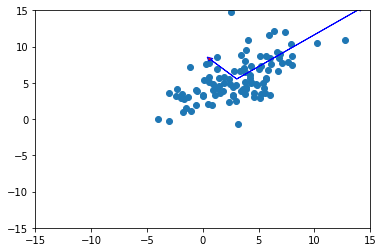

In [134]:
## d
plt.scatter(X1,X2)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.arrow(mean[0],mean[1], eigen[0]*eigen_vec[0][0],\
          eigen[0]*eigen_vec[1][0],\
          head_width=0.5, head_length=0.5, fc='r', ec='b')
plt.arrow(mean[0],mean[1], eigen[1]*eigen_vec[0][1],\
          eigen[1]*eigen_vec[1][1],\
          head_width=0.5, head_length=0.5, fc='r', ec='b')
plt.savefig('Q3_d.jpg')
plt.show()

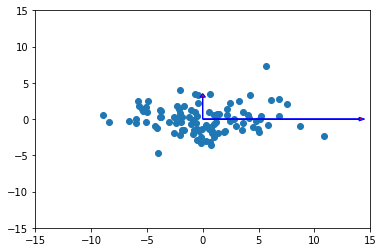

In [135]:
zero_mean_X = X - mean
zero_mean_X = eigen_vec.T.dot(zero_mean_X.T).T
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.arrow(0, 0, eigen[0], 0,length_includes_head=True,\
         head_width=0.5, head_length=0.5, fc='r', ec='b')
plt.arrow(0, 0, 0, eigen[1],length_includes_head=True,\
         head_width=0.5, head_length=0.5, fc='r', ec='b')
plt.scatter(zero_mean_X[:,0], zero_mean_X[:,1])
plt.savefig('Q3_e.jpg')
plt.show()